Imports

In [501]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Codigo de los metodos utilizados

In [502]:
def euler_explicito(funcion, intervalo, paso):
    num_puntos = int(intervalo / paso) + 1
    resultados_u = np.zeros(num_puntos, dtype=float)
    resultados_v = np.zeros(num_puntos, dtype=float)
    resultados_u[0] = 0
    resultados_v[0] = 0

    for n in range(num_puntos - 1):
        u_actual = resultados_u[n] + paso * resultados_v[n]
        resultados_u[n+1] = u_actual
        v_actual = resultados_v[n] + paso * funcion(resultados_u[n])
        resultados_v[n+1] = v_actual

    return resultados_u

def euler_implicito(inversa_matriz_a, termino_independiente, intervalo, paso):
    num_puntos = int(intervalo / paso) + 1
    resultados = np.zeros((2, num_puntos))

    for n in range(num_puntos - 1):
        valores_auxiliares = inversa_matriz_a @ resultados[:, n] + termino_independiente
        resultados[:, n+1] = valores_auxiliares

    return resultados[1]

def runge_kuta_orden2(f, intervalo, paso):
    num_puntos = int(intervalo / paso) + 1
    resultados_u = np.zeros(num_puntos, dtype=float)
    resultados_v = np.zeros(num_puntos, dtype=float)
    resultados_u[0] = 0
    resultados_v[0] = 0

    for n in range(num_puntos - 1):
        u_prediccion = resultados_u[n] + paso * resultados_v[n]
        v_prediccion = resultados_v[n] + paso * f(resultados_u[n])

        resultados_u[n+1] = resultados_u[n] + (paso/2) * (resultados_v[n] + v_prediccion)
        resultados_v[n+1] = resultados_v[n] + (paso/2) * (f(resultados_u[n]) + f(u_prediccion))

    return resultados_u

In [503]:
def error_euler(aproximacion,intervalo,h, analitica):
    paso = 0
    error = aproximacion[:]
    for i in range(len(aproximacion)):
        error[i] = analitica(paso) - aproximacion[i]
        paso+=h
    return error


def error_rugen_kutta(aproximacion, intervalo, h, analitica):
    paso = 0
    error = aproximacion[:]
    for i in range(len(aproximacion)):
        error[i] = analitica(paso) - aproximacion[i]
        paso += h
    return error

Constantes dadas para resolver el problema

In [504]:
padronJI = 106957
padronTB = 102665
padronCZ = 106260
padron = np.sum([padronJI,padronTB,padronCZ])
denominador = 200
m = padronJI/denominador  # masa (kg)
k = 25000  # constante elástica del muelle (N/m)
lambda_ = 0  # constante de amortiguación (Ns/m)
c = 0.1  # cota del terreno (m)

# Condiciones iniciales
y0 = 0.1  # posición inicial
v0 = 0.0  # velocidad inicial

# Parámetros de simulación
delta_tiempo = 0.005  # segundos
c_prim = 0
h = 0.005
intervalo = 5
t=np.arange(0,intervalo+h,h)

y_t_EulerExplicito = 'y(t) euler explicito con paso = '
y_nombre_EulerExplicito = 'EulerExplicito'
e_t_EulerExplicito = 'e(t) euler explicito con paso = '
e_nombre_EulerExplicito = 'error-EulerExplicito'


y_t_EulerImplicito = 'y(t) euler implicito con paso = '
y_nombre_EulerImplicito = 'EulerImplicito'
e_t_EulerImplicito = 'e(t) euler implicito con paso = '
e_nombre_EulerImplicito = 'error-EulerImplicito'

y_t_RK2 = 'y(t) RK2 con paso = '
y_nombre_RK2 = 'RK2'
e_t_RK2 = 'e(t) RK2 con paso = '
e_nombre_RK2 = 'error-RK2'

## Solución analitica del problema
def analitica(t):
    return c - c * np.cos(((k/m)**0.5)*t)

def funcion_sin_amortiguacion(x):
    return (k/m)*(c-x)

'Matriz inversa para la solucion de euler implicito sin amortiguacion'
divisor = (h**2)*k+h*lambda_+m

A_invertida = np.array([
    [m/divisor , -h*k/divisor],
    [h*m/divisor , (h*lambda_+m)/divisor]
])

termino_indep = np.array([h*((k*c/m)+(lambda_*c_prim/m)),0])

t=np.arange(0,intervalo+h,h)

Ejecuciones con h = 0.005

Metodo de Euler explicito sin amortiguar

In [505]:
rango = 5
paso = 0.005
aprox_euler_explicito = euler_explicito(funcion_sin_amortiguacion,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

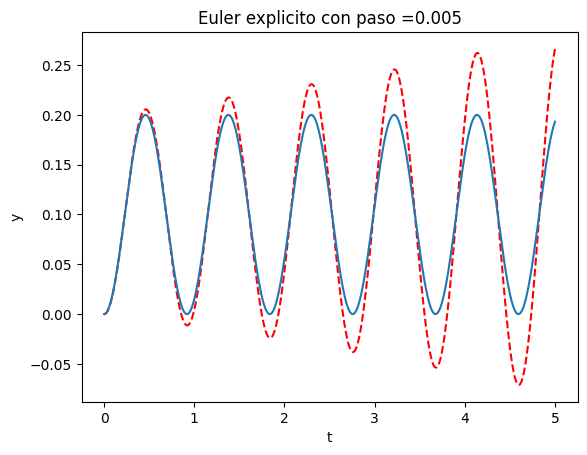

Text(0.5, 1.0, 'error euler implicito con paso = 0.005')

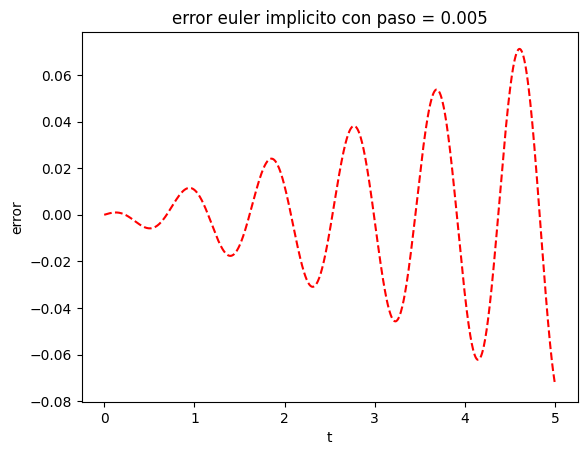

In [506]:
plt.plot(tiempo_discretizado,aprox_euler_explicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler explicito con paso =" + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_explicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(h))

Metodo de Euler implicito sin amortiguar

In [507]:
rango = 5
paso = 0.005
aprox_euler_implicito = euler_implicito(A_invertida,termino_indep,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

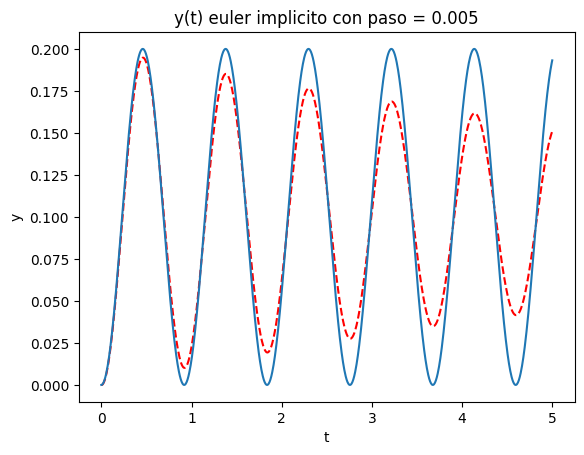

Text(0.5, 1.0, 'error euler implicito con paso = 0.005')

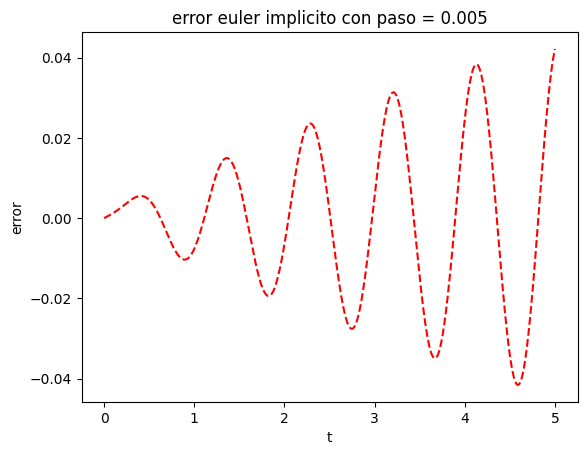

In [508]:
plt.plot(tiempo_discretizado,aprox_euler_implicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("y(t) euler implicito con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_implicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(h))

Ruggen Kutta de orden 2

In [509]:
rango = 5
paso = 0.005
runge_kutta = runge_kuta_orden2(funcion_sin_amortiguacion, rango, paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

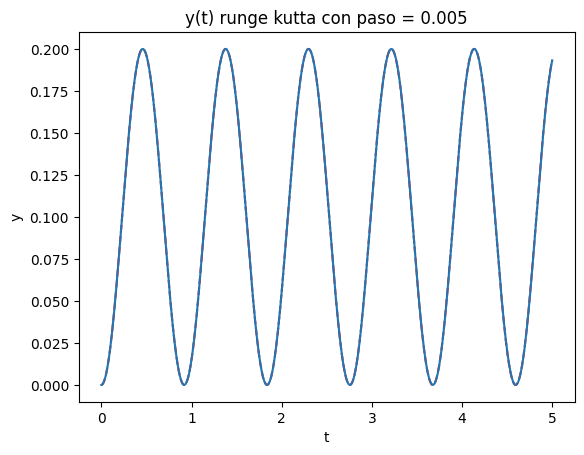

Text(0.5, 1.0, 'Error con el metodo de runge kutta de orden 2')

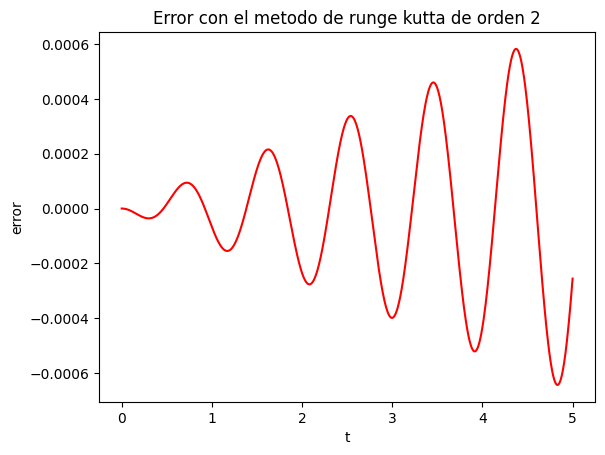

In [510]:
plt.plot(tiempo_discretizado,runge_kutta, 'r--')
plt.title("y(t) runge kutta con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

error = error_rugen_kutta(runge_kutta, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "red")
plt.xlabel('t')
plt.ylabel('error')
plt.title("Error con el metodo de runge kutta de orden 2")

Se calcula el orden del metodo usando el paso más estable de las 3 ejecuciones realizadass

In [511]:
error_explicito = error_euler(aprox_euler_explicito, rango, paso, analitica)
error_implicito = error_euler(aprox_euler_implicito, rango, paso, analitica)
error_kutta = error_rugen_kutta(runge_kutta, rango, paso, analitica)

# Error Euler explicito

delta_e_1 = error_explicito[-1] - error_explicito[-2]
delta_e_2 = error_explicito[-2] - error_explicito[-3]
delta_e_3 = error_explicito[-3] - error_explicito[-4]

p = np.log(delta_e_1/delta_e_2)/np.log(delta_e_2/delta_e_3)
print("El orden de convergencia de Euler explicito es: " + str(p))

# Error Euler implicito

delta_i_1 = error_implicito[-1] - error_implicito[-2]
delta_i_2 = error_implicito[-2] - error_implicito[-3]
delta_i_3 = error_implicito[-3] - error_implicito[-4]

p = np.log(delta_i_1/delta_i_2)/np.log(delta_i_2/delta_i_3)
print("El orden de convergencia de Euler implicito es: " + str(p))

# Error Runge Kutta

delta_k_1 = error_kutta[-1] - error_kutta[-2]
delta_k_2 = error_kutta[-2] - error_kutta[-3]
delta_k_3 = error_kutta[-3] - error_kutta[-4]

p = np.log(delta_k_1/delta_k_2)/np.log(delta_k_2/delta_k_3)
print("El orden de convergencia de Euler runge kutta es: " + str(p))

El orden de convergencia de Euler explicito es: 1.091634176201194
El orden de convergencia de Euler implicito es: 1.0900572934323425
El orden de convergencia de Euler runge kutta es: 1.0970729275266298


Aprovechando que este h es el mas estable de las 3 ejecuciciones para estimar el w solicitado en el punto 1.2

Obtengo los indices de donde se encuentran los maximos de la función

In [512]:
maximos_implicito, _ = find_peaks(aprox_euler_implicito)
maximos_explicito, _ = find_peaks(aprox_euler_explicito)
maximos_runge_kutta, _ = find_peaks(runge_kutta) 

diferencias_explicito = np.diff(maximos_implicito)
diferencias_implicito = np.diff(maximos_explicito)
diferencias_runge_kutta = np.diff(maximos_runge_kutta)

promedio_explicito = np.mean(diferencias_explicito)
promedio_implicito = np.mean(diferencias_implicito)
promedio_runge_kutta = np.mean(diferencias_runge_kutta)

frecuencia_exp_explicito = 2*np.pi/promedio_explicito
frecuencia_exp_implicito = 2*np.pi/promedio_implicito
frecuencia_exp_runge_kutta = 2*np.pi/promedio_runge_kutta

print("La frecuencia de euler explicito es: " + str(frecuencia_exp_explicito))
print("La frecuencia de euler implicito es: " + str(frecuencia_exp_implicito))
print("La frecuencia de runge kutta es: " + str(frecuencia_exp_runge_kutta))

La frecuencia de euler explicito es: 0.034147746234671664
La frecuencia de euler implicito es: 0.034147746234671664
La frecuencia de runge kutta es: 0.03419420575335829


Ejecuciones para h = 0.01

Metodo de Euler explicito sin amortiguar

In [513]:
rango = 5
paso = 0.01
aprox_euler_explicito = euler_explicito(funcion_sin_amortiguacion,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

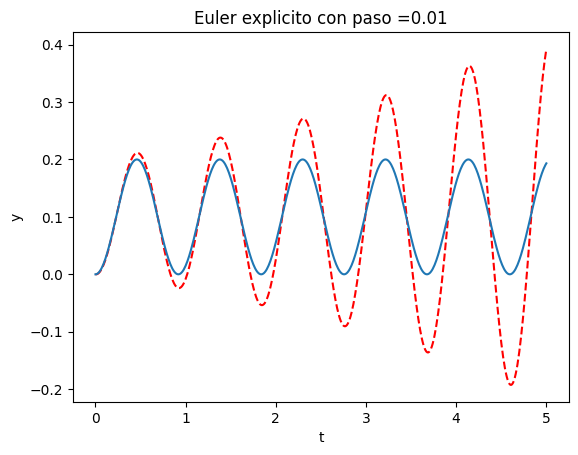

Text(0.5, 1.0, 'error euler implicito con paso = 0.01')

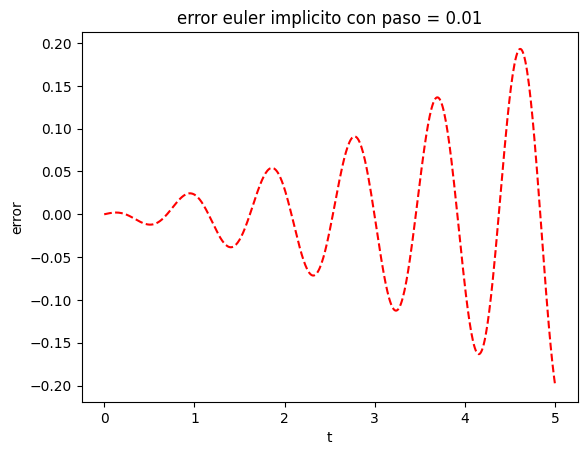

In [514]:
plt.plot(tiempo_discretizado,aprox_euler_explicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler explicito con paso =" + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_explicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Metodo de Euler implicito sin amortiguar

In [515]:
rango = 5
paso = 0.01
aprox_euler_implicito = euler_implicito(A_invertida,termino_indep,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

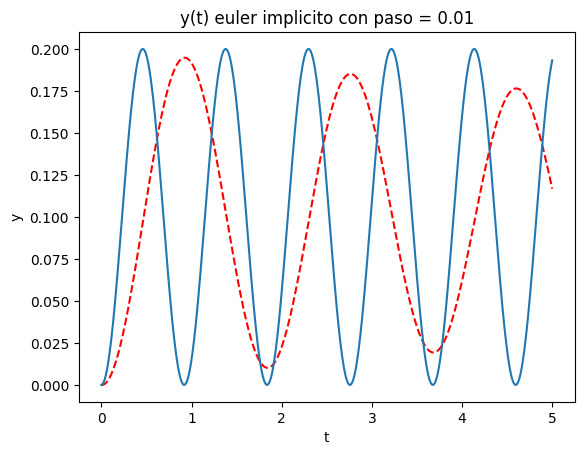

Text(0.5, 1.0, 'error euler implicito con paso = 0.01')

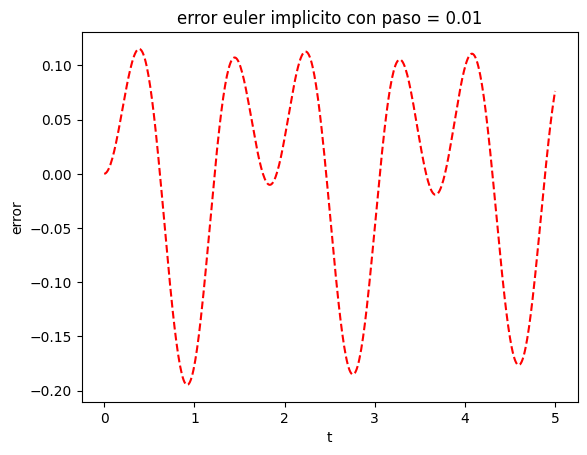

In [516]:
plt.plot(tiempo_discretizado,aprox_euler_implicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("y(t) euler implicito con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_implicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Ruggen Kutta de orden 2

In [517]:
rango = 5
paso = 0.01
runge_kutta = runge_kuta_orden2(funcion_sin_amortiguacion, rango, paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

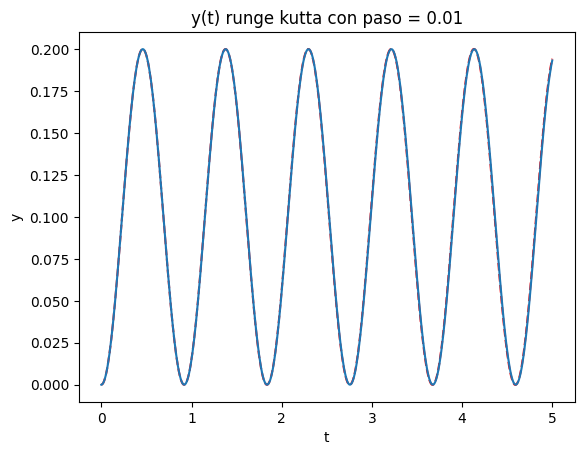

Text(0.5, 1.0, 'Error con el metodo de runge kutta de orden 2')

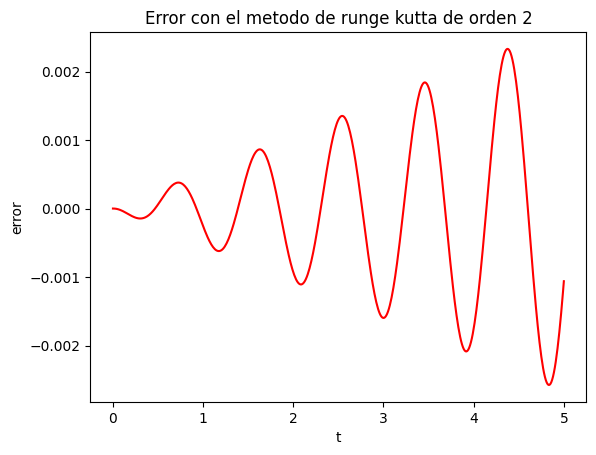

In [518]:
plt.plot(tiempo_discretizado,runge_kutta, 'r--')
plt.title("y(t) runge kutta con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

error = error_rugen_kutta(runge_kutta, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "red")
plt.xlabel('t')
plt.ylabel('error')
plt.title("Error con el metodo de runge kutta de orden 2")

Graficas con h = 0.00001

Metodo de Euler explicito sin amortiguar

In [519]:
rango = 5
paso = 0.00001
aprox_euler_explicito = euler_explicito(funcion_sin_amortiguacion,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)[0:500000]

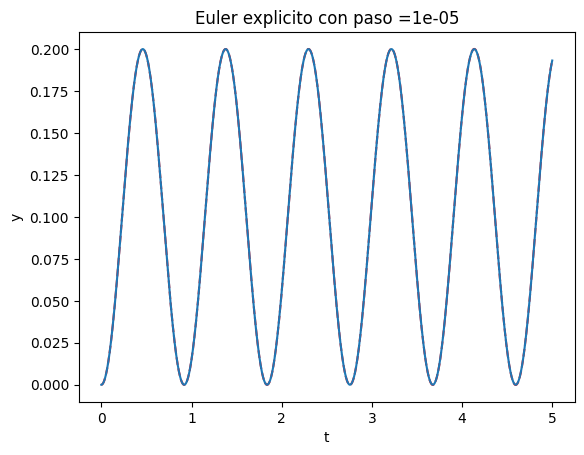

Text(0.5, 1.0, 'error euler implicito con paso = 1e-05')

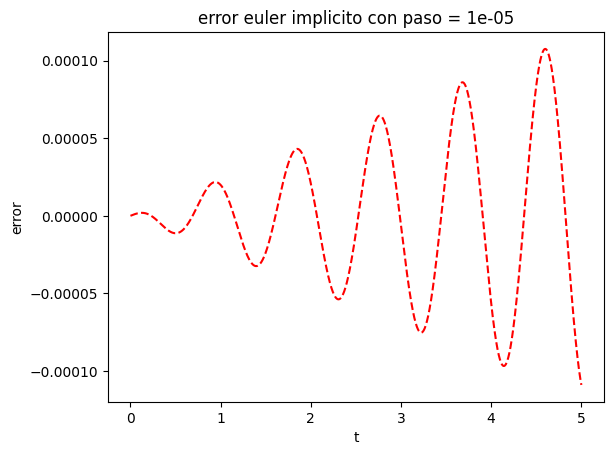

In [520]:
plt.plot(tiempo_discretizado,aprox_euler_explicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler explicito con paso =" + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_explicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Metodo de Euler implicito sin amortiguar

In [521]:
rango = 5
paso = 0.00001
aprox_euler_implicito = euler_implicito(A_invertida,termino_indep,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)[0:500000]

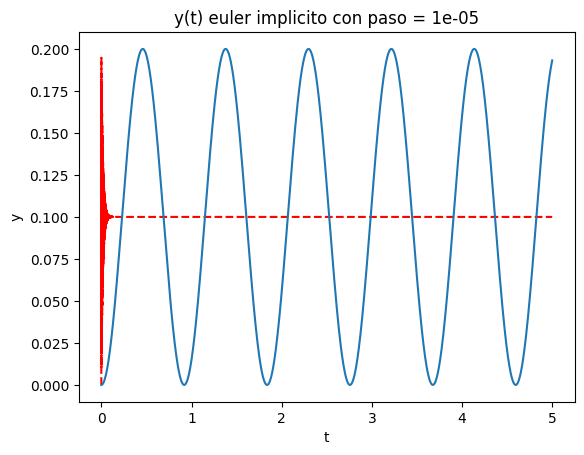

Text(0.5, 1.0, 'error euler implicito con paso = 1e-05')

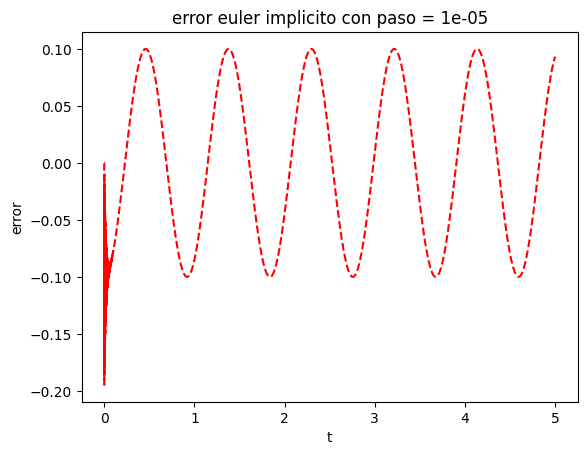

In [522]:
plt.plot(tiempo_discretizado,aprox_euler_implicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("y(t) euler implicito con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_implicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Ruggen Kutta de orden 2

In [523]:
rango = 5
paso = 0.00001
runge_kutta = runge_kuta_orden2(funcion_sin_amortiguacion, rango, paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)[0:500000]

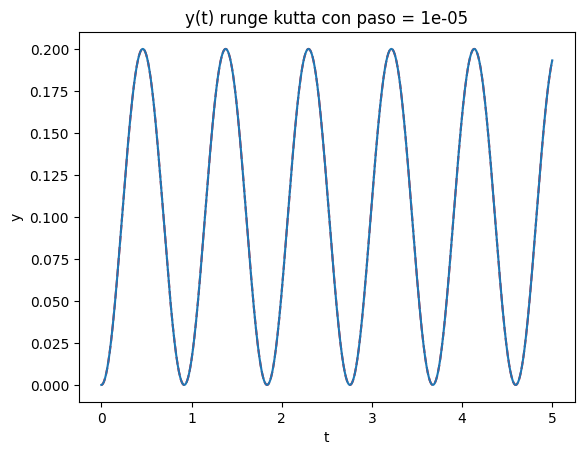

Text(0.5, 1.0, 'Error con el metodo de runge kutta de orden 2')

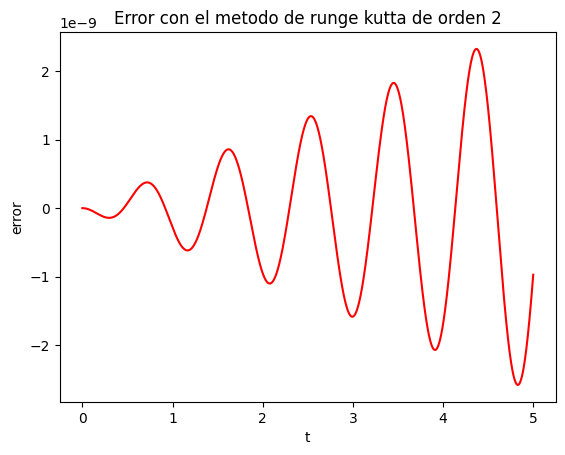

In [524]:
plt.plot(tiempo_discretizado,runge_kutta, 'r--')
plt.title("y(t) runge kutta con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

error = error_rugen_kutta(runge_kutta, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "red")
plt.xlabel('t')
plt.ylabel('error')
plt.title("Error con el metodo de runge kutta de orden 2")